# Exercício 03 - PEL201

Nome: Gustavo Bodra

Matrícula: 120301-7

## Exercício

Implementar o Algoritmo de PRIM e de Djkstra.

In [1]:
from collections import deque, namedtuple
import string
import random
from random import seed
from random import randint
import time
import timeit
from itertools import chain
import functools
from tqdm import tqdm
import matplotlib.pyplot as plt

seed(1)

In [2]:
dense_graph = [ [ [letter, oletter, randint(0, 100)] for oletter in range(0, 26) if oletter != letter] for letter in range(0, 26) ]
dense_graph = list(chain.from_iterable(dense_graph))
dense_graph[:10]

[[0, 1, 17],
 [0, 2, 72],
 [0, 3, 97],
 [0, 4, 8],
 [0, 5, 32],
 [0, 6, 15],
 [0, 7, 63],
 [0, 8, 97],
 [0, 9, 57],
 [0, 10, 60]]

In [3]:
sparse_graph = [ [ [letter, oletter, randint(0, 100)] for oletter in range(0, 26) if oletter != letter and bool(random.getrandbits(1))] for letter in range(0, 26) ]
sparse_graph = list(chain.from_iterable(sparse_graph))
sparse_graph[:10]

[[0, 1, 65],
 [0, 2, 48],
 [0, 8, 72],
 [0, 9, 96],
 [0, 10, 6],
 [0, 12, 50],
 [0, 13, 81],
 [0, 16, 21],
 [0, 17, 93],
 [0, 18, 5]]

### Algoritmo de PRIM
O algoritmo de PRIM é um algoritmo que encontra a árvore de extensão mínima (Minimum Spanning Tree) de um grafo. Este algoritmo consiste nos seguintes passos:

1. Selecionar um vértice aleatoriamente e iniciar a árvore;

2. Selecione uma aresta que se conecta com um vértice que já está na árvore e que tenha o menor custo;

3. Insira esta aresta e seu vértice no grafo;

4. Repita o passo 2 e 3 até que todos os vértices estejam na árvore.

`Linguagem: Python`

In [4]:
def create_adj_matrix(V, G):
    adj_matrix = []
    
    for i in range(0, V):
        adj_matrix.append([])
        
        for j in range(0, V):
            adj_matrix[i].append(0)
    
    for i in range(0, len(G)):
        adj_matrix[G[i][0]][G[i][1]] = G[i][2]
        adj_matrix[G[i][1]][G[i][0]] = G[i][2]
    
    return adj_matrix

def prims(V, G):
    adj_matrix = create_adj_matrix(V, G)
    vertex = 0
    MST = []
    edges = []
    visited = []
    min_edge = [None,None,float('inf')]
    
    while len(MST) != V-1:
        visited.append(vertex)
        
        for r in range(0, V):
            if adj_matrix[vertex][r] != 0:
                edges.append([vertex,r,adj_matrix[vertex][r]])
        
        for e in range(0, len(edges)):
            if edges[e][2] < min_edge[2] and edges[e][1] not in visited:
                min_edge = edges[e]
        
        edges.remove(min_edge)
        MST.append(min_edge)
        vertex = min_edge[1]
        min_edge = [None,None,float('inf')]

    return MST

In [5]:
n_tests = 100

prims_dense_runtime_list = []
for i in tqdm(range(0, n_tests)):
    prims_start = time.time()
    prims(26, dense_graph)
    prims_end = time.time()
    prims_runtime = prims_end - prims_start
    prims_dense_runtime_list.append(prims_runtime)

prims_sparse_runtime_list = []
for i in tqdm(range(0, n_tests)):
    prims_start = time.time()
    prims(26, sparse_graph)
    prims_end = time.time()
    prims_runtime = prims_end - prims_start
    prims_sparse_runtime_list.append(prims_runtime)

100%|██████████| 100/100 [00:00<00:00, 252.56it/s]


### Algoritmo Dijkstra
O algoritmo de Dijkstra encontra o menor caminho entre os nós de um grafo. Este algoritmo consiste nos seguintes passos:

1. Marque todos os nós como não visitados e crie uma lista de nós ainda não visitados;

2. Coloque uma distância inicial para cada nó. Para o nó de origem coloque 0 para os demais coloque INFINITO;

3. Para o nó atual busque todos os seus vizinhos e compare a distância estimada inicialmente e a distância real, salve o menor valor;

4. Ao terminar de visitar todos os nós vizinhos, marque o nó inicial como visitado e remova da lista de nós não visitados;

5. Se o nó de destino for marcado como visitado ou então a menor distância estimada para os nós da lista de não visitados for infinito, finalize o algoritmo.

6. Caso contrário selecione o nó não visitado com a menor distância estimada e volte ao passo 3.

`Linguagem: Python`

In [6]:
INF = float('inf')
Edge = namedtuple('Edge', 'start, end, cost')


def make_edge(start, end, cost=1):
    return Edge(start, end, cost)

class Graph:
    def __init__(self, edges):
        self.edges = [make_edge(*edge) for edge in edges]

    @property
    def vertices(self):
        return set(
            sum(
                ([edge.start, edge.end] for edge in self.edges), []
            )
        )

    def get_node_pairs(self, n1, n2):
        return [[n1, n2]]

    def remove_edge(self, n1, n2):
        node_pairs = self.get_node_pairs(n1, n2)
        edges = self.edges[:]
        
        for edge in edges:
            if [edge.start, edge.end] in node_pairs:
                self.edges.remove(edge)

    def add_edge(self, n1, n2, cost=1):
        node_pairs = self.get_node_pairs(n1, n2)
        self.edges.append(Edge(start=n1, end=n2, cost=cost))

    @property
    def neighbours(self):
        neighbours = { vertex: set() for vertex in self.vertices }
        
        for edge in self.edges:
            neighbours[edge.start].add((edge.end, edge.cost))

        return neighbours

    def dijkstra(self, source, dest):
        distances = { vertex: INF for vertex in self.vertices }
        
        previous_vertices = { vertex: None for vertex in self.vertices }
        
        distances[source] = 0
        vertices = self.vertices.copy()

        while vertices:
            current_vertex = min(vertices, key=lambda vertex: distances[vertex])
            vertices.remove(current_vertex)
            
            if distances[current_vertex] == INF:
                break
            
            for neighbour, cost in self.neighbours[current_vertex]:
                alternative_route = distances[current_vertex] + cost
                
                if alternative_route < distances[neighbour]:
                    distances[neighbour] = alternative_route
                    previous_vertices[neighbour] = current_vertex

        path, current_vertex = deque(), dest
        
        while previous_vertices[current_vertex] is not None:
            path.appendleft(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        
        if path:
            path.appendleft(current_vertex)
        
        return list(path)

In [7]:
graph = Graph(dense_graph)
n_tests = 100

dijkstra_dense_runtime_list = []
for i in tqdm(range(0, n_tests)):
    dijkstra_start = time.time()
    graph.dijkstra(0, 25)
    dijkstra_end = time.time()
    dijkstra_runtime = dijkstra_end - dijkstra_start
    dijkstra_dense_runtime_list.append(dijkstra_runtime)

# Esparso
graph = Graph(sparse_graph)

dijkstra_sparse_runtime_list = []
for i in tqdm(range(0, n_tests)):
    dijkstra_start = time.time()
    graph.dijkstra(0, 25)
    dijkstra_end = time.time()
    dijkstra_runtime = dijkstra_end - dijkstra_start
    dijkstra_sparse_runtime_list.append(dijkstra_runtime)

100%|██████████| 100/100 [00:05<00:00, 17.86it/s]


### Principais Diferenças

1. O algoritmo de Dijkstra encontra o menor caminho entre nós e o algoritmo de PRIM encontra a árvore de extensão mínima;

2. O algoritmo de PRIM funciona somente em grafos não-direcionais sendo que o algoritmo de Dijkstra consegue trabalhar com grafos direcionais e não-direcionais

3. O algoritmo de Dijkstra falhará caso uma das distâncias for negativa ao contrário do algoritmo de PRIM que não terá problemas.

Os algoritmos são similares, porém sua aplicação é ligeiramente diferente. Podemos pensar no algoritmo de Dijkstra como a melhor forma de planejar uma rota entre diversas cidades com o objetivo de economizar tempo e combustível. Já o algoritmo de PRIM irá servir para planejar a forma mais eficiente de se construir estradas para conectar duas cidades.

### Comparativo de Desempenho

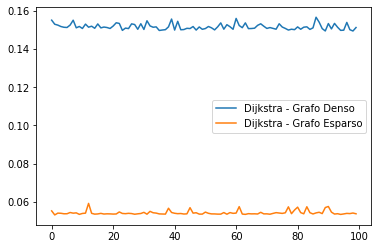

In [8]:
fig, ax = plt.subplots()
line1, = ax.plot(dijkstra_dense_runtime_list, label='Dijkstra - Grafo Denso')
line2, = ax.plot(dijkstra_sparse_runtime_list, label='Dijkstra - Grafo Esparso')
ax.legend()
plt.show()

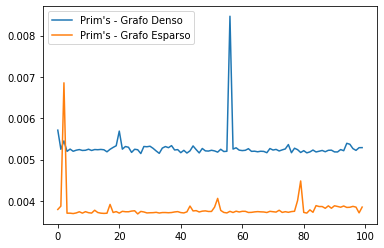

In [9]:
fig, ax = plt.subplots()
line3, = ax.plot(prims_dense_runtime_list, label='Prim\'s - Grafo Denso')
line4, = ax.plot(prims_sparse_runtime_list, label='Prim\'s - Grafo Esparso')
ax.legend()
plt.show()

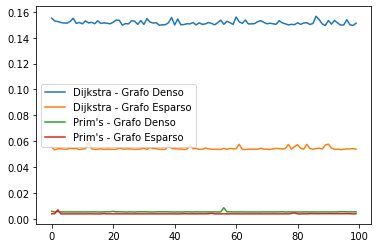

In [10]:
fig, ax = plt.subplots()
line1, = ax.plot(dijkstra_dense_runtime_list, label='Dijkstra - Grafo Denso')
line2, = ax.plot(dijkstra_sparse_runtime_list, label='Dijkstra - Grafo Esparso')
line3, = ax.plot(prims_dense_runtime_list, label='Prim\'s - Grafo Denso')
line4, = ax.plot(prims_sparse_runtime_list, label='Prim\'s - Grafo Esparso')
ax.legend()
plt.show()